# Python for (open) Neuroscience

_Lecture 1.0_ - Introduction to `numpy`

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/lectures/Lecture1.0_Numpy-intro.ipynb)

## Working with libraries (/packages/modules)

We can import external libraries using `import`.

Sometimes, external libraries will need to be installed (but Colab already features the ones we will be using now). We will see in a future lecture more on installing libraries.

In [ ]:
# this command adds a whole bunch of functions and classes for us to use:
import numpy

# This function creates an array from a list:
numpy.array([1,2,3])

We can give aliases to the library we import for the sake of brevity:

In [1]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

We can also import specific functions (or classes) from a library with this syntax:

In [2]:
from numpy import array
array([1,2,3])

array([1, 2, 3])

## The `numpy` library

NumPy is a Python library to create, manipulate, and combine arrays. 

An array is an ordered collection of items that can be accessed via an index. 

While they may seem similar to lists, arrays are much more powerful because they support a wealth of operations that cannot be performed on lists. 

## Array arithmetics

Arrays let us do entirely new operations:

In [3]:
# With lists, there is no way to do vector operations:
[5, 5, 5] - [1, 1, 1]  

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [4]:
import numpy as np
np.array([5, 5, 5]) - np.array([1, 1, 1])

array([4, 4, 4])

### A small note on credit & citations

Many times we forget to do so, but remember: there's scientists behind many open-source tools, and citations are the way we can reward them in academic currency! 

(but buy them beer if you ever encounter them in person 🍺)

    Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2

Let's import the library!

In [6]:
import numpy as np

## `np.ndarray`

Data type (a class!) representing N-dimensional arrays

Workhorse of scientific computing!

A note on language: when we say `array` we do not imply any number (`n`) of dimensions:
- <span style="color:indianred">vectors</span> will be arrays with `n=1` (i.e., 1D)
- <span style="color:indianred">matrices</span> will be arrays with `n=2` (i.e., 2D)
- <span style="color:indianred">tensors</span> will be arrays with `n>=3` (i.e., 3D or more)

Related note: there is a `np.matrix` class in `numpy`, but you **should not** use it; it has not been adopted much and  it might be removed soon!

`np.ndarray` is a powerful data storing structure:

- it uses memory very efficiently even for large data (imaging data, movies, ephys...)

- it gives powerful indexing functionalities

- implements vectors/matrices algebric operations

### Note for the MATLAB addicts

The NumPy documentation provides a [useful cheatsheet](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) to facilitate the transition from MATLAB to NumPy arrays!

## Creating arrays

### Initialize empty arrays

#### `np.zeros()`

We can create a simple array of zeros using the `np.zeros` function, and passing it a single integer n to create a 1D vector of length n:


In [7]:
np.zeros(2)  # we pass a single integer for a 1D array

array([0., 0.])

If we want a multidimensional array (eg 2D matrix), we pass a tuple of numbers indicating the size for every dimension:

In [11]:
np.zeros((3,2))  # we pass the tuple (3, 2) to have a 3 x 2 matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

#### `np.ones()`

The `np.ones` function works in the same way but creates a matrix of ones:

In [13]:
np.ones((3,2, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

#### `np.full()`

We can inizialize a matrix with arbitrary values using `np.full`:

In [14]:
np.full((2,3), 20)

array([[20, 20, 20],
       [20, 20, 20]])

## Types of values in arrays

In numpy arrays, **all elements must be of the same type**! (This is important to make arrays efficient)

By default, `np.nparray`s will be initialized with `float` values:

In [15]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

To specify the data type of our array, we can pass the `dtype` argument (for data type). For example, we can make it `int`:

In [16]:
np.zeros((2,3), dtype=bool)

array([[False, False, False],
       [False, False, False]])

To change the data type of an existing array, we can use the `.astype(new_type)` method:

In [17]:
my_arr = np.full((2,3), 1.)
my_arr.astype(int)

array([[1, 1, 1],
       [1, 1, 1]])

## `np.nan`

The `numpy` equivalent of `None` is `nan` (Not a Number). We can add nans in an array of floats:

In [18]:
my_arr = np.full((2,3), np.nan)
my_arr

array([[nan, nan, nan],
       [nan, nan, nan]])

In [19]:
# this code will fail, as the array type is int:
my_arr = np.full((2,3), 1)
my_arr[0] = np.nan

ValueError: cannot convert float NaN to integer

### Memory-efficient types

We can also use some special data type from numpy, for memory saving purposes:
 - `np.uint8` (numbers from 0 to 255)
 - `np.int8` (numbers from -128 to 127)
 - `np.uint16` (numbers from 0 to 65535)
 - `np.int16` (numbers from -32768 to 32767)
 
The number (8 or 16) represents the number of **bits** used for every entry in the array!

In [25]:
a_python_int_array = np.ones((200, 300), dtype=int)

# With this code we can ask for the size of the array in RAM memory, with the (default) sys library:
import sys
sys.getsizeof(a_python_int_array) 

480128

In [ ]:
a_uint8_array = np.ones((200, 300), dtype=np.uint8)

sys.getsizeof(a_uint8_array)  # the np.uint8 type is much more efficient!

We can also make arrays of text! 

In [26]:
txt = np.full((300,2000), "some text")

txt  # look at the dtype! the number you read will be the number of characters:

array([['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ...,
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text'],
       ['some text', 'some text', 'some text', ..., 'some text',
        'some text', 'some text']], dtype='<U9')

### Useful attributes of `np.ndarray` objects

Being objects, `np.ndarray`s have **attributes** (or, most likely, properties) that can be useful to check out how they are structured!

### `.shape` and `.ndim`

The `.ndim` attribute gives us the number of dimensions of the array

In [27]:
my_array = np.zeros((4,3, 5, 10))

my_array.ndim

4

The `.shape` attribute gives us the shape (the number of elements along each dimension of the array):

In [28]:
my_array = np.ones((4, 3, 3, 10))

In [29]:
my_array.shape

(4, 3, 3, 10)

### `.dtype`

The `.dtype` attribute gives the type of the elements in the array:

In [30]:
my_array = np.full((4,3,5), 10.)
my_array.dtype

dtype('float64')

### `.size`

Do not confuse `.shape` with `.size`! `.size` gives the numbers of elements in the whole matrix:

In [31]:
my_array = np.full((4,3), 3)
my_array.size

12

Note that an array's size is the product of its shape's elements (i.e., a (4,3) array contains 12 elements because 4*3 = 12)

In [ ]:
my_array.size == (my_array.shape[0] * my_array.shape[1])

### Convert lists to arrays

One way of creating an array is to convert an existing list into an array with the `np.array()` function:

In [ ]:
my_list = [1,2,3,4]
np.array(my_list)

Converting **lists of lists** will add more dimensions:

In [34]:
my_list = [[1,2,3,4], 
           [2,3,4,5]]
np.array(my_list)

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

If you do so, make sure that all lists have the same length!

#### `np.arange()`

We can create ordered sequences of numbers using `np.arange()`:

In [35]:
np.arange(10)  # numbers from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can optionally specify start, end, and step of the sequence (start and steps are optional; the logic is the same as for the list indexing)

In [36]:
np.arange(1, 10, 3)  # numbers from 1 to 10 in steps of 2:

array([1, 4, 7])

#### `np.linspace()`

Alternatively, we can use `np.linspace()` to generate n=`num` equally spaced numbers in a specified range:

In [37]:
# 5 equispaced values between 0 and 10, included:
np.linspace(0, 1, 100) # aka np.linspace(0, 10, num=5)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

### Random arrays

We can use the `np.random` submodule to create random arrays. For example:

In [38]:
np.random.randint(0, 10, (3,2))  # we pass min, max, and desired shape of the random array

array([[6, 2],
       [6, 1],
       [3, 0]])

(Practicals 1.0.0)

## Indexing arrays

We have three ways of indexing arrays:
 - **slicing**: as for lists (specifying single values, or start/end/steps)
 - **integer indexing**: specifying with lists/arrays/tuples of indexes which elements to keep
 - **boolean indexing**: using `True`/`False` lists/arrays/tuples to specify which elements to keep

### Slicing

We can index arrays as we were doing with lists (this operation is called array **slicing**). For a 1D array:

In [3]:
my_vect = np.arange(0, 10)
print(my_vect)
print(my_vect[:5])  # first 5
print(my_vect[-3:])  # last 3
print(my_vect[:6:2])  # first 6, one every two

print(my_vect[:])  # this is a "null" indexing that returns all values

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[7 8 9]
[0 2 4]
[0 1 2 3 4 5 6 7 8 9]


But! With `np.ndarray`s we have more flexibility than with lists!

### Indexing with arrays (or lists) of integer indexes

We can index passing an array (or a list) of the index values that we want to retrieve!

In [5]:
my_vect = np.random.normal(0, 10, 7)  # 4 values from a normal distribution of mean 0, std 10
print(my_vect)

[ -6.31054481  -3.2324502    2.76922287  -6.78739881 -10.31540009
 -11.72610999   5.76359461]


In [6]:
index_list = [0, 1, 6]  # to be indexes, those values have to be integers!

my_vect[index_list]  # we pass the index list (or array) in square brackets

array([-6.31054481, -3.2324502 ,  5.76359461])

In [7]:
index_list = [0.0, 2.0]  # won't work with floats

my_vect[index_list]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Boolean indexing

Alternatively, we can use arrays of boolean values.

The boolean indexing vector must have the same shape of the array to be indexed!

In [10]:
my_vect = np.array([1,2,3,4, 5])

boolean_selector = [True, False, True, False, False]

my_vect[boolean_selector]

array([1, 3])

Boolean indexing is a powerful way of filtering arrays based on some criterion:

In [11]:
thr = 3
boolean_selector = my_vect > thr  # this operation returns a boolean array with the element-wise results
print(boolean_selector)

[False False False  True  True]


In [12]:
my_vect[boolean_selector]

array([4, 5])

### Multidimensional indexing

Many times, we want to index independently one or many axes of an n-dimensional array.

We can index over multiple dimensions specifying **comma-separated** indexes along each dimension:

In [15]:
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])
print(my_mat)
print("----")
# this idexes the first dimension (select the 3rd row) and leaves all elements over the second (:):
print(my_mat[2, :])

# this idexes the second dimension (select the 1st column) and leaves all elements over the rows (:):
print(my_mat[:, 0])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
----
[11 12 13 14 15]
[ 1  6 11]


In [16]:
# this takes one every 2 columns, for the first 2 rows:
my_mat[:2, ::2]

array([[ 1,  3,  5],
       [ 6,  8, 10]])

If we specify a single index, `numpy` assumes you're indexing the first dimension:


In [17]:
my_mat[2, :]  # the same as writing my_mat[2, :], but discouraged!

array([11, 12, 13, 14, 15])

### Combining indexing

We can use any combination of indexes and boolean selectors for each axis, as long as the dimension matches:

In [19]:
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])

# Boolean indexing over one dimesion
boolean_selector = np.array([True, False, False])
my_mat[:, boolean_selector]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 5 but corresponding boolean dimension is 3

In [21]:
# Boolean selector over one axis, numerical indexing over another axis, slicing over the third axis:
my_mat[boolean_selector, 1]

array([2])

## array views

Indexing operations return **views** on the original arrays, NOT COPIES! Changing values in the slice we will also alter the original array!

In [25]:
# import numpy as np
my_mat = np.array([[1,   2,  3,  4, 5],
                   [6,   7,  8,  9, 10],
                   [11, 12, 13, 14, 15]])

a_slice = my_mat[2, :] .copy() # this is a view of the original data, not a copy!
print(a_slice)
a_slice[0] = 100
print(my_mat)

[11 12 13 14 15]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [ ]:
my_mat

### Mind singleton dimensions!

Arrays can have **singleton dimensions** - _i.e._ dimensions along which there is a single entry.
In python, an array of size `(4,)` and an array of size `(4,1)` are different even if they look the same!

In [26]:
my_arr = np.zeros(4)  # this is a 1D array

print(f"{my_arr}; shape: {my_arr.shape}")

[0. 0. 0. 0.]; shape: (4,)


In [27]:
my_arr_1 = np.zeros((4, 1))  # this is a 2D array with a singleton dimension!
print(f"{my_arr_1}; shape: {my_arr_1.shape}")

[[0.]
 [0.]
 [0.]
 [0.]]; shape: (4, 1)


Sometimes, it can be useful to quickly add a singleton dimension:

In [29]:
my_arr = np.zeros(4)  # 1D array

# With this special indexing, we artificially add a singleton dimension on first dim:
my_arr = my_arr[:, np.newaxis]  

print(f"{my_arr}; shape: {my_arr.shape}")

[[0.]
 [0.]
 [0.]
 [0.]]; shape: (4, 1)


## Visualize arrays and matrices

We can visualize arrays and matrices using the `matplotlib.pyplot` library.

In [30]:
from matplotlib import pyplot as plt  # code you'll write many times in Python...
import numpy as np

We can plot 1D arrays (or lists!) using `plt.plot()`:

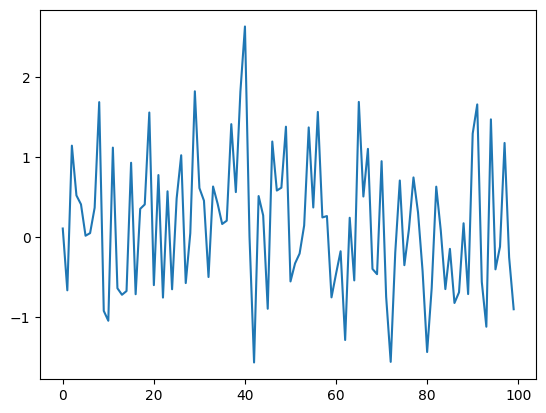

In [31]:
random_vect = np.random.randn(100)  # normal random vals array of shape 100
plt.plot(random_vect)

We can also plot multiple arrays together:

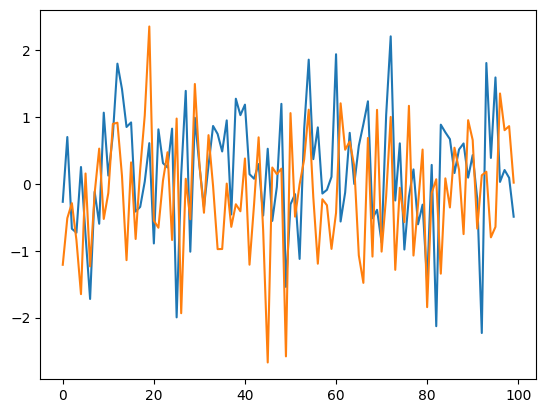

In [32]:
# each line will be an element over the second dimension, in this case we will have 2 lines):
random_vect = np.random.randn(100, 2)  # normal random vals array of shape (100, 2)
plt.plot(random_vect)

We can visualize 2D matrices with `plt.matshow()`

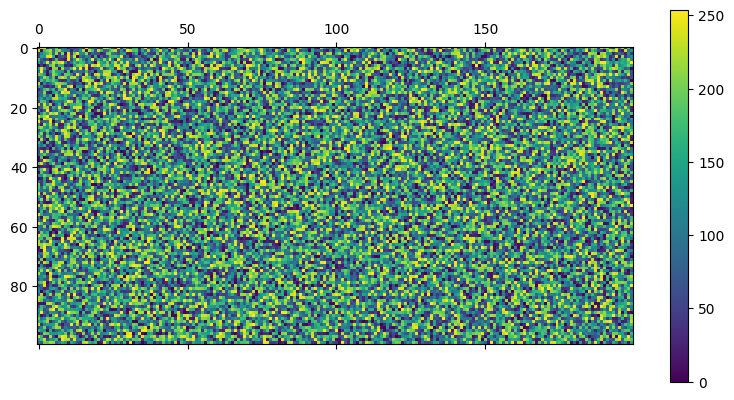

In [33]:
random_mat = np.random.randint(0, 255, (100, 200))  # (100, 200) shape array of random integers between 0 and 255:

plt.matshow(random_mat)  # plt.imshow()
plt.colorbar()

This can be convenient to check quickly the results of slicing:

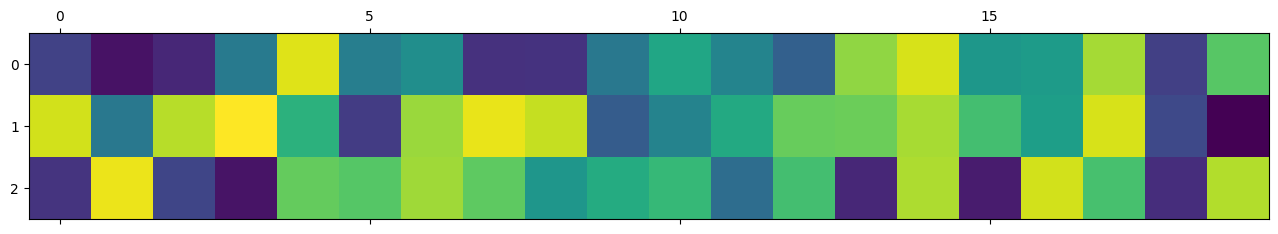

In [34]:
plt.matshow(random_mat[:3, ::10])

There's much more to the matplotlib library, we'll discover more things as we go!

(Practicals 1.0.1)

[if we still have time]

### `.T`

We can get a **transposed view** (NOT A COPY) of a matrix with the `.T` attribute:

In [ ]:
m = np.ones((3,2))
print(m)

In [ ]:
m_t = m.T
print(m_t)

In [ ]:
m_t[0, 0] = 2  # this is a view: if we change values in the transposed array, we change the original as well:
m

### `.flatten()`

We can flatten all values of an N-dimensional array into a 1D array with the `.flatten()` syntax. This will make **a copy of the array**!

In [ ]:
m = np.ones((3,2,3))
m_flat = m.flatten()

print(m.shape, m_flat.shape)
m_flat

### `np.concatenate()`

We can concatenate arrays along any dimension by putting them in a list and pass the list to the `np.concatenate()` function:

In [ ]:
arr_list = [np.zeros(3), np.ones(3)]

np.concatenate(arr_list) 

By default, we concatenate over the first dimension:

In [ ]:
arr_list = [np.zeros((2,3)), np.ones((1,3))]
arr_list

In [ ]:
np.concatenate(arr_list)  # if ndims > 1 by default we concatenate over the first dimension

but we can pass an `axis` argument to change the default behavior:

In [ ]:
arr_list = [np.zeros((3,2)), np.ones((3,2))]

np.concatenate(arr_list, axis=1) 

### `np.stack()`

We can pile up arrays over a new dimension with  `np.stack()`:

In [ ]:
arr_list = [np.zeros((3, 2)), np.ones((3, 2))]

np.stack(arr_list).shape

## Array operations

We obviously want to do some math with those arrays!

### Operations with numbers

Operations with arrays are **by default element-wise**! (performed separately on every number of the array)

Sum / subtraction / multiplication / division apply to individual entries of the array:

In [ ]:
np.ones(3) + 1

In [ ]:
my_arr = np.ones((4,3))
my_arr[0, :] *= 100  # syntax equivalent to my_arr[0, :] = my_arr[0, :] * 100
my_arr

Exponentiation also works element-wise:

In [ ]:
np.array((1,2,3))**3

### Operations between arrays

`numpy` works element-wise also when operating between arrays:

In [ ]:
arr_1 = np.array([[1,2],
                  [3,4]])
arr_2 = np.array([[0,0],
                  [0,2]])

arr_1 * arr_2

In [ ]:
arr_1 ** arr_2

Therefore, we normally expect arrays of matching shapes, or we get a `ValueError`!

In [ ]:
np.ones((2, 3)) * np.ones((4, 5))

### Broadcasting

`numpy` has a smart way of dealing with some scenarios of non-matching dimensions, and we should use it!

Can be a bit tricky at the beginning, but it is very important: we can write very efficient and readable code with it!

In [ ]:
# Assume we have a matrix of data:
data = np.array([[ 0.0,  0.0,  0.0],
                 [10.0, 10.0, 10.0],
                 [20.0, 20.0, 20.0],
                 [30.0, 30.0, 30.0]])

data.shape

In [ ]:
offsets = np.array([1.0, 2.0, 3.0])  # we want to add an offset to each data column:
data + offsets

### What is happening?

Numpy automatically infer missing values to create arrays of matching shape, where it can the operate element-wise!

![Alt Text](https://numpy.org/doc/stable/_images/broadcasting_2.png)

## How does broadcasting work

When operating on two arrays, NumPy compares their shapes. It starts **with the trailing** dimension - i.e., the rightmost dimension in the `shape` tuple - and works its way left. In a `(2,3)` matrix, broadcasting will start from columns (the `3` in `(2,3)`) and move on to rows (the `2` in `(2,3)`).

Two dimensions are compatible when:

 - they are equal, or
 - one of them is 1.

![Alt Text](https://i0.wp.com/andrewm4894.com/wp-content/uploads/2020/10/Annotation-2020-10-15-133235.jpg?w=486&ssl=1)

In our case:

In [ ]:
print(f"shape a: {a.shape}")
print(f"shape b: {b.shape}")

Shape b matches shape a over the last dimension, and is propagated over the rest of the dimensions

For example, this operation will not work!

In [ ]:
a = np.concatenate([np.full((1,4), i) for i in range(5)], axis=0)
print(a)

In [ ]:
b = np.ones(5)
print("shape a: ", a.shape)
print("shape b: ", b.shape)

# this will not work as the rightmost dimensions are 5 and 4:
a + b 

To make it work, we can use a trick: add a new "dummy" singleton dimension to `b` that will be broadcasted with the syntax `[:, np.newaxis]`

In [ ]:
b_twodim = b[:, np.newaxis]  # This does the trick by adding a dummy singleton dimension
print("shape a: ", a.shape)
print("shape b_twodim: ", b_twodim.shape)
a + b_twodim  # now the last dimension is compatible between the two arrays: